<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/deep-learning/first_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# create train and validate set

In [2]:
tensor_celsius = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
tensor_fahrenheit = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [3]:
# this function returns a random permutation of integers from 0
# up but not include n.
torch.randperm(10)

tensor([5, 6, 7, 0, 8, 9, 2, 3, 4, 1])

In [4]:
# we want to create a validation set of data so our loss
# will be on the validation set and not training set - this helps
# us see when overfitting is happening.
random_indices = torch.randperm(tensor_celsius.size()[0])

In [5]:
random_indices

tensor([ 5,  1,  7,  0,  2, 10,  9,  6,  8,  4,  3])

In [6]:
size_of_training_set = int(tensor_celsius.size()[0] * 0.75)

In [7]:
t_c_train = tensor_celsius[random_indices[:size_of_training_set]]
t_f_train = tensor_fahrenheit[random_indices[:size_of_training_set]]
t_c_validation = tensor_celsius[random_indices[size_of_training_set:]]
t_f_validation = tensor_fahrenheit[random_indices[size_of_training_set:]]

In [8]:
t_c_train

tensor([ 8.0000, 14.0000, -4.0000,  0.5000, 15.0000, 21.0000, 13.0000,  3.0000])

In [9]:
t_f_train

tensor([48.9000, 55.9000, 21.8000, 35.7000, 58.2000, 68.4000, 60.4000, 33.9000])

In [10]:
t_c_validation

tensor([ 6., 11., 28.])

In [11]:
t_f_validation

tensor([48.4000, 56.3000, 81.9000])

In [12]:
def model(input_tensor, w, b):
  return input_tensor * w + b

In [13]:
# expects two tesnors, return mean square error.
def loss(predicted, expected):
  square_diffs = (predicted - expected)**2
  return square_diffs.mean()

# Using `nn.Linear` in place of our handcrafted linear model

In [14]:
# instead of using our hand coded linear model,
# we can use torch.nn's version, which contains
# internal representation of parameters.
nn_linear_model = nn.Linear(1, 1)

In [15]:
# the original weight + bias of model are randomly selected
# and they automatically track gradient
nn_linear_model.weight

Parameter containing:
tensor([[-0.8247]], requires_grad=True)

In [16]:
nn_linear_model.bias

Parameter containing:
tensor([-0.5049], requires_grad=True)

In [17]:
# our model maps 1 -> 1
# our tensor has size 11
# nn.Linear expects input has dimension B x I
# where B is number of batches and I is the dimension
# of one data point.
# so we need to add an additional dimension to our input
# + output.
t_c_train.unsqueeze_(1)
t_c_validation.unsqueeze_(1)
t_f_train.unsqueeze_(1)
t_f_validation.unsqueeze_(1)

tensor([[48.4000],
        [56.3000],
        [81.9000]])

now we are swapping our model with the `torch.nn`'s linear model.

In [18]:
# very easy to put in parameters in nn.model into optimizer! just do the
# following. We used to have to manually put each individual parameters
# now we can just call model.parameters()!
optimizer = optim.SGD(nn_linear_model.parameters(), lr = 1e-3)

In [19]:
def training_loop(num_epochs, optimizer, model, loss_function, x_train, y_train,
                  x_validation, y_validation):
  for curr_epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()

    y_pred = model(x_train)
    train_loss = loss_function(y_pred, y_train)
    train_loss.backward()

    optimizer.step() # update parameters this optimizer owns via GD

    with torch.no_grad(): # to calculate validation loss we don't want to keep track of gradients!
      validate_loss = loss_function(model(x_validation), y_validation)

    if curr_epoch % 1000 == 0:
      print(f'at epoch {curr_epoch} in the training, train loss is {train_loss}')
      print(f'at epoch {curr_epoch} in the training, validation loss is {validate_loss}')

In [20]:
training_loop(5000, optimizer, nn_linear_model, loss, t_c_train, t_f_train, t_c_validation, t_f_validation)

at epoch 1000 in the training, train loss is 84.32779693603516
at epoch 1000 in the training, validation loss is 131.6757354736328
at epoch 2000 in the training, train loss is 20.858726501464844
at epoch 2000 in the training, validation loss is 49.9796142578125
at epoch 3000 in the training, train loss is 10.105816841125488
at epoch 3000 in the training, validation loss is 28.624099731445312
at epoch 4000 in the training, train loss is 8.284037590026855
at epoch 4000 in the training, validation loss is 21.91288948059082
at epoch 5000 in the training, train loss is 7.975397109985352
at epoch 5000 in the training, validation loss is 19.50279426574707


In [21]:
# re-initialize linear model.
nn_linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(nn_linear_model.parameters(), lr = 1e-3)

In [22]:
# we can actually use nn module's loss function in place of our handcrafted loss function
training_loop(5000, optimizer, nn_linear_model, nn.MSELoss(),
              t_c_train, t_f_train,
              t_c_validation, t_f_validation)

at epoch 1000 in the training, train loss is 81.27919006347656
at epoch 1000 in the training, validation loss is 128.17942810058594
at epoch 2000 in the training, train loss is 20.342302322387695
at epoch 2000 in the training, validation loss is 49.130069732666016
at epoch 3000 in the training, train loss is 10.018329620361328
at epoch 3000 in the training, validation loss is 28.374265670776367
at epoch 4000 in the training, train loss is 8.269221305847168
at epoch 4000 in the training, validation loss is 21.826997756958008
at epoch 5000 in the training, train loss is 7.9728899002075195
at epoch 5000 in the training, validation loss is 19.470335006713867


# Using a sequential model with a hidden layer

In [23]:
sequential_model = nn.Sequential(nn.Linear(1, 10),
                                 nn.Tanh(),
                                 nn.Linear(10, 1))

In [24]:
sequential_model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
optimizer = optim.SGD(sequential_model.parameters(), lr = 1e-3)

In [26]:
training_loop(num_epochs=5000,
              optimizer = optimizer,
              model = sequential_model,
              loss_function = nn.MSELoss(),
              x_train = t_c_train,
              y_train = t_f_train,
              x_validation = t_c_validation,
              y_validation = t_f_validation)

at epoch 1000 in the training, train loss is 11.0955171585083
at epoch 1000 in the training, validation loss is 119.56627655029297
at epoch 2000 in the training, train loss is 8.27355670928955
at epoch 2000 in the training, validation loss is 134.71205139160156
at epoch 3000 in the training, train loss is 8.139941215515137
at epoch 3000 in the training, validation loss is 148.6379852294922
at epoch 4000 in the training, train loss is 10.482951164245605
at epoch 4000 in the training, validation loss is 125.20874786376953
at epoch 5000 in the training, train loss is 9.931116104125977
at epoch 5000 in the training, validation loss is 112.3355941772461


In [27]:
def plot(model, x_train, y_train, x_validate, y_validate):
  plt.figure(dpi = 200, figsize = (4, 2.5))
  plt.scatter(x_train[:, 0], y_train[:, 0], label = 'train')
  plt.scatter(x_validate[:, 0], y_validate[:, 0], label = 'validation')
  plt.legend()
  plt.xlabel('Celsius')
  plt.ylabel('Fahrenheit')
  plt.plot(np.arange(-5, 30, 0.5), model(torch.arange(-5, 30, 0.5).unsqueeze(1))[:, 0].detach().numpy(), color = 'r')

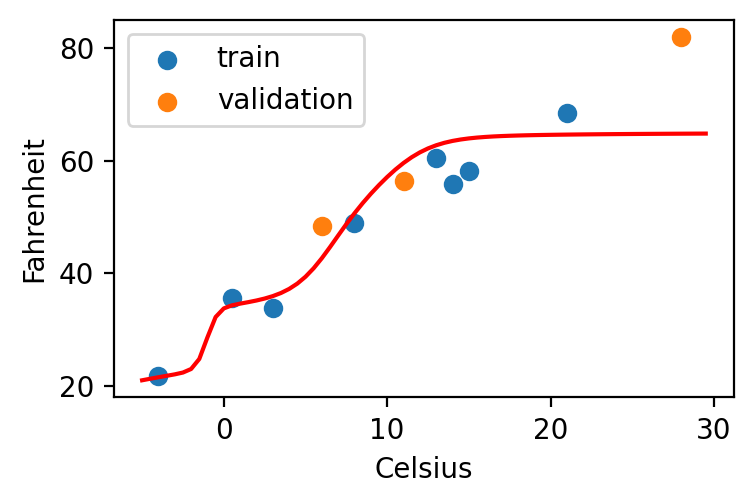

In [28]:
plot(sequential_model, t_c_train, t_f_train, t_c_validation, t_f_validation)

This model isn't that good, as it overfits?

let's try `Adam` optimizer

In [32]:
sequential_model = nn.Sequential(nn.Linear(1, 10),
                                 nn.Tanh(),
                                 nn.Linear(10, 1))

In [33]:
optimizer = optim.Adam(sequential_model.parameters())

In [34]:
training_loop(num_epochs=5000,
              optimizer = optimizer,
              model = sequential_model,
              loss_function = nn.MSELoss(),
              x_train = t_c_train,
              y_train = t_f_train,
              x_validation = t_c_validation,
              y_validation = t_f_validation)

at epoch 1000 in the training, train loss is 1682.3369140625
at epoch 1000 in the training, validation loss is 2887.0390625
at epoch 2000 in the training, train loss is 1044.3670654296875
at epoch 2000 in the training, validation loss is 1967.65625
at epoch 3000 in the training, train loss is 623.646240234375
at epoch 3000 in the training, validation loss is 1311.61572265625
at epoch 4000 in the training, train loss is 364.1521301269531
at epoch 4000 in the training, validation loss is 859.9027709960938
at epoch 5000 in the training, train loss is 224.56536865234375
at epoch 5000 in the training, validation loss is 572.1427612304688


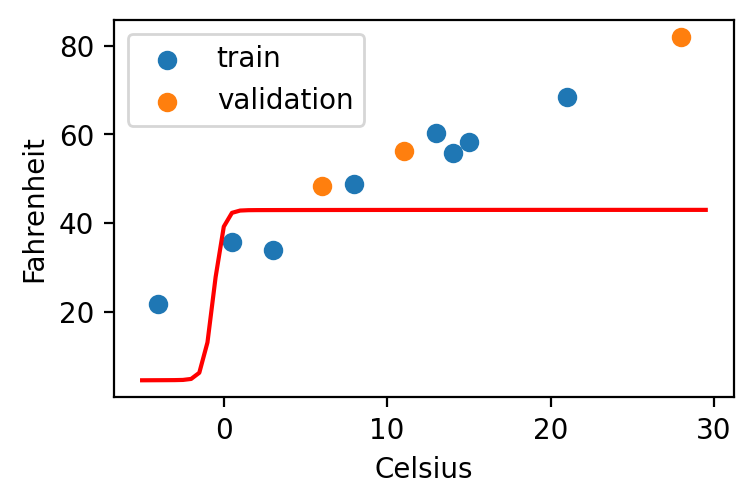

In [35]:
plot(sequential_model, t_c_train, t_f_train, t_c_validation, t_f_validation)

In [36]:
training_loop(num_epochs=5000,
              optimizer = optimizer,
              model = sequential_model,
              loss_function = nn.MSELoss(),
              x_train = t_c_train,
              y_train = t_f_train,
              x_validation = t_c_validation,
              y_validation = t_f_validation)

at epoch 1000 in the training, train loss is 92.89738464355469
at epoch 1000 in the training, validation loss is 386.373291015625
at epoch 2000 in the training, train loss is 34.61552047729492
at epoch 2000 in the training, validation loss is 261.4800720214844
at epoch 3000 in the training, train loss is 15.79643726348877
at epoch 3000 in the training, validation loss is 198.2067108154297
at epoch 4000 in the training, train loss is 10.636016845703125
at epoch 4000 in the training, validation loss is 161.18775939941406
at epoch 5000 in the training, train loss is 7.214162349700928
at epoch 5000 in the training, validation loss is 128.29054260253906


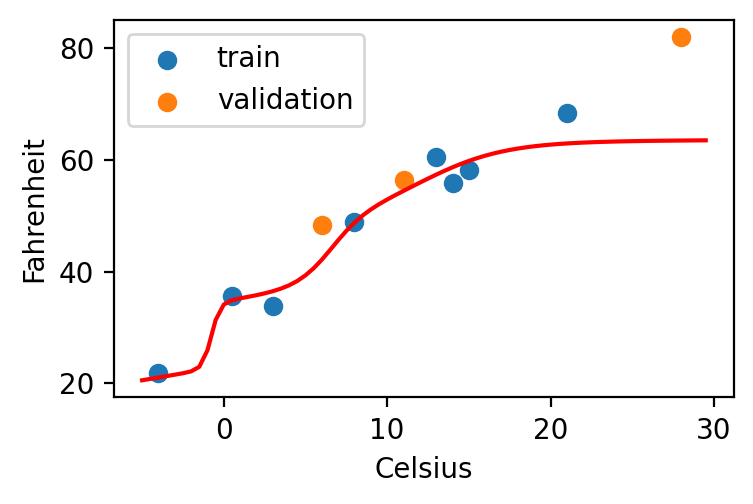

In [37]:
plot(sequential_model, t_c_train, t_f_train, t_c_validation, t_f_validation)

at epoch 1000 in the training, train loss is 5.007354259490967
at epoch 1000 in the training, validation loss is 101.91375732421875
at epoch 2000 in the training, train loss is 3.789216995239258
at epoch 2000 in the training, validation loss is 82.79029846191406
at epoch 3000 in the training, train loss is 3.119985580444336
at epoch 3000 in the training, validation loss is 69.44927215576172
at epoch 4000 in the training, train loss is 2.6551103591918945
at epoch 4000 in the training, validation loss is 59.710418701171875
at epoch 5000 in the training, train loss is 2.3716607093811035
at epoch 5000 in the training, validation loss is 54.74757766723633


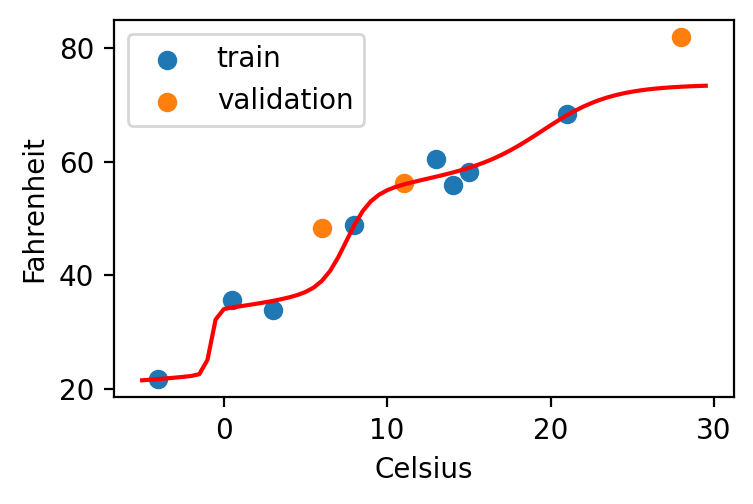

In [38]:
training_loop(num_epochs=5000,
              optimizer = optimizer,
              model = sequential_model,
              loss_function = nn.MSELoss(),
              x_train = t_c_train,
              y_train = t_f_train,
              x_validation = t_c_validation,
              y_validation = t_f_validation)
plot(sequential_model, t_c_train, t_f_train, t_c_validation, t_f_validation)

Althuogh this squiggly line looks like overfitting, it is better than our model before. `Adam` optimizer is indeed better. when we used vanilla `SGD` we really need to pick the right learning rate for the whole thing to work.

# experimentation

Let's experiment with the number of hidden neurons + learning rate to see what kind of setting will produce more linear output. We will just use `Adam` so we don't need to worry about learning rate for now.

What kind of setting will overfit?

In [50]:
num_neurons_in_hidden = 100
activation_func = nn.Tanh()

In [51]:
sequential_model = nn.Sequential(nn.Linear(1, num_neurons_in_hidden),
                                 activation_func,
                                 nn.Linear(num_neurons_in_hidden, 1))

In [52]:
optimizer = optim.Adam(sequential_model.parameters())

In [57]:
training_loop(num_epochs=5000,
              optimizer = optimizer,
              model = sequential_model,
              loss_function = nn.MSELoss(),
              x_train = t_c_train,
              y_train = t_f_train,
              x_validation = t_c_validation,
              y_validation = t_f_validation)

at epoch 1000 in the training, train loss is 1.1338785886764526
at epoch 1000 in the training, validation loss is 52.1921272277832
at epoch 2000 in the training, train loss is 0.8403124809265137
at epoch 2000 in the training, validation loss is 75.41072845458984
at epoch 3000 in the training, train loss is 0.6454278826713562
at epoch 3000 in the training, validation loss is 112.65918731689453
at epoch 4000 in the training, train loss is 0.42223060131073
at epoch 4000 in the training, validation loss is 144.38124084472656
at epoch 5000 in the training, train loss is 0.21172963082790375
at epoch 5000 in the training, validation loss is 174.8223419189453


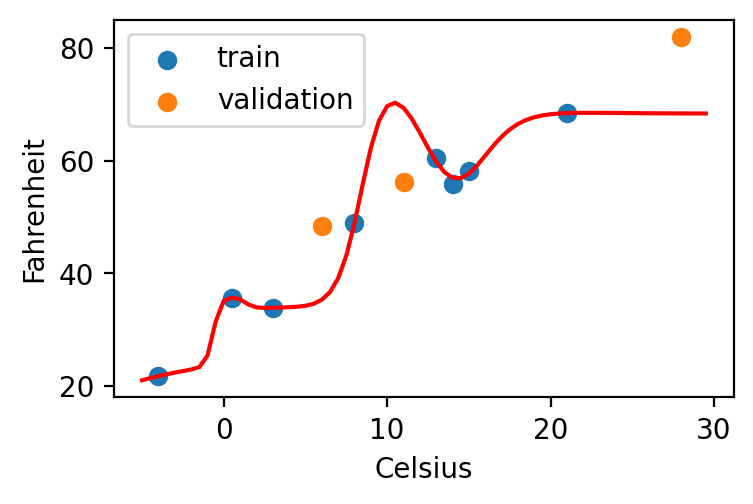

In [58]:
plot(sequential_model, t_c_train, t_f_train, t_c_validation, t_f_validation)

As we can see, when we have 100 neurons in the hidden layer, the model clearly overfits to the training data and has very high validation loss.

In [72]:
num_neurons_in_hidden = 2
activation_func = nn.Tanh()

In [73]:
sequential_model = nn.Sequential(nn.Linear(1, num_neurons_in_hidden),
                                 activation_func,
                                 nn.Linear(num_neurons_in_hidden, 1))

In [74]:
optimizer = optim.Adam(sequential_model.parameters())

In [89]:
training_loop(num_epochs=5000,
              optimizer = optimizer,
              model = sequential_model,
              loss_function = nn.MSELoss(),
              x_train = t_c_train,
              y_train = t_f_train,
              x_validation = t_c_validation,
              y_validation = t_f_validation)

at epoch 1000 in the training, train loss is 5.693150997161865
at epoch 1000 in the training, validation loss is 50.8156623840332
at epoch 2000 in the training, train loss is 5.69122838973999
at epoch 2000 in the training, validation loss is 49.78010177612305
at epoch 3000 in the training, train loss is 5.6905975341796875
at epoch 3000 in the training, validation loss is 49.11484146118164
at epoch 4000 in the training, train loss is 5.690411567687988
at epoch 4000 in the training, validation loss is 48.717342376708984
at epoch 5000 in the training, train loss is 5.690375328063965
at epoch 5000 in the training, validation loss is 48.55767822265625


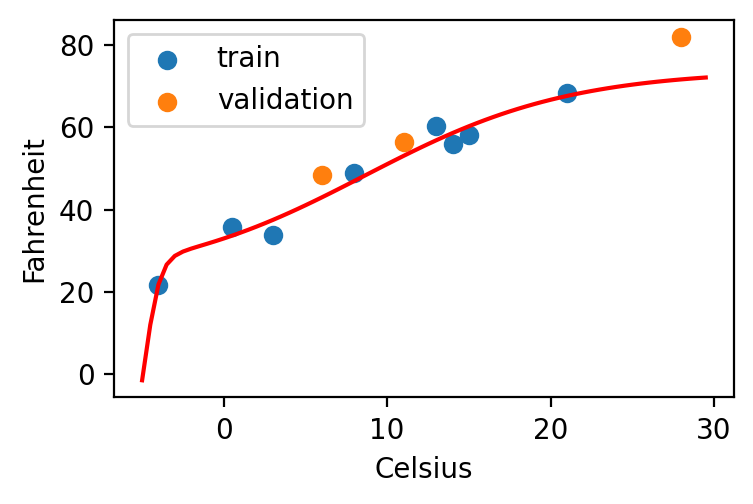

In [90]:
plot(sequential_model, t_c_train, t_f_train, t_c_validation, t_f_validation)

As we can see, when we only have 2 neurons, the model is more linear and smooth.

In [91]:
num_neurons_in_hidden = 1
activation_func = nn.Tanh()

In [92]:
sequential_model = nn.Sequential(nn.Linear(1, num_neurons_in_hidden),
                                 activation_func,
                                 nn.Linear(num_neurons_in_hidden, 1))

In [93]:
optimizer = optim.Adam(sequential_model.parameters())

In [116]:
training_loop(num_epochs=5000,
              optimizer = optimizer,
              model = sequential_model,
              loss_function = nn.MSELoss(),
              x_train = t_c_train,
              y_train = t_f_train,
              x_validation = t_c_validation,
              y_validation = t_f_validation)

at epoch 1000 in the training, train loss is 6.339258193969727
at epoch 1000 in the training, validation loss is 33.8261604309082
at epoch 2000 in the training, train loss is 6.329986572265625
at epoch 2000 in the training, validation loss is 33.36839294433594
at epoch 3000 in the training, train loss is 6.321872711181641
at epoch 3000 in the training, validation loss is 32.80720901489258
at epoch 4000 in the training, train loss is 6.314680576324463
at epoch 4000 in the training, validation loss is 32.47262191772461
at epoch 5000 in the training, train loss is 6.308605670928955
at epoch 5000 in the training, validation loss is 32.36952209472656


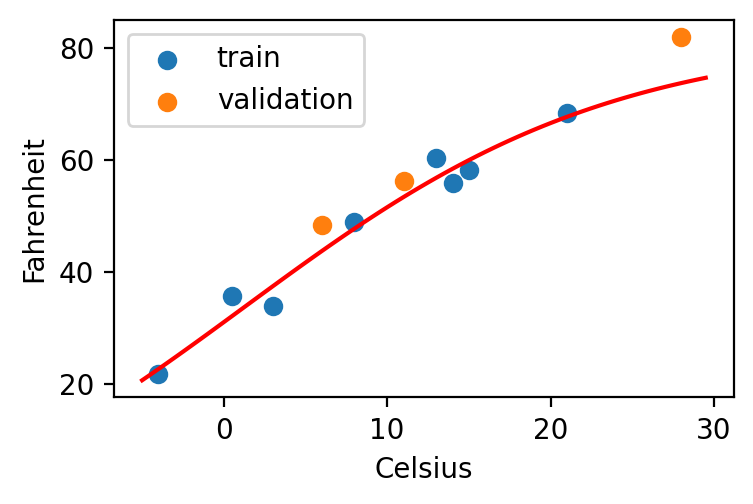

In [117]:
plot(sequential_model, t_c_train, t_f_train, t_c_validation, t_f_validation)

As we can see, when we have only 1 neuron, it even looks more like a line! Althuogh it has a little bit of curvature, due to the nonlinear activation function.

# Conclusion

- A lot of neurons in hidden layers tend to overfit the model
- have to use a validation set to even detect overfitting, else we will think our model is great because loss on training set is reducing, but that doesn't mean neural net is generalizing to unseen data!
- learning rate is a important parameter when we use vanilla `SGD`. else the training will oscillate
- `torch.nn` module provides a lot of different models like linear model and loss functions
- `nn.Sequential` allows us to build model that consists of layers upon layers of different models.
- `nn.models`expects the input to be in **batches** so as to utilize the full power of parallelization of GPU. (in dimension **`B X I`** where B = num of batches, I is input features dimension) 